### Name: Emmanuel Itighise
* 3mtt Data Science Cohort 3
* Fellow ID: FE/23/44778000

# Evaluating the Impact of Marketing Campaigns

In a fast paced world like we experience daily, every company seeks one means of the other to maintain profitability and gain quantifiable market share. For marketing companies they focus on consistently running successful campaigns in a complex and competitive market.

For this to be possible, they set up on A/B testing systems, a randomized experimentation method that involves presenting different versions of a variable (such as a web page, banner, or ad) to separate segments of the audience simultaneously. This approach helps determine which version has the most significant impact on business metrics.

To address these questions, the company conducted an A/B test, where the majority of participants were exposed to ads (the experimental group) and a smaller portion saw a Public Service Announcement (PSA) or nothing (the control group).

## About the Dataset

| **Feature**         | **Description**                                                                                 |
|--------------------|-------------------------------------------------------------------------------------------------|
| **Row Index**      | Row index                                                                                      |
| **User ID**        | Unique identifier for each user                                                                |
| **Test Group**     | Indicates whether the user was in the "ad" group (saw the advertisement) or the "psa" group (saw the public service announcement or nothing) |
| **Converted**      | Indicates whether the user bought the product (True) or not (False)                            |
| **Total Ads**      | The number of ads seen by the user                                                             |
| **Most Ads Day**   | The day when the user saw the highest number of ads                                            |
| **Most Ads Hour**  | The hour of the day when the user saw the highest number of ads                                |

The marketing data can be found **[here](https://drive.google.com/file/d/1YDS_6_1sCJPjucNX6Feo9uGa8B3w8Xzk/view?usp=sharing)**.

## Objective

The primary objective of this case study is to perform hypothesis testing on the e-commerce dataset to compare different groups or features. Specifically, we aim to:

- Analyze the experimental and control groups to determine if the ads were successful.

- Estimate the potential revenue generated from the ads.

- Assess the statistical significance of the differences between the groups using A/B testing techniques.

# Task Solution

## Cleaning Stage

In [ ]:

#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
# load the ads campaign dataset

file_id = '1YDS_6_1sCJPjucNX6Feo9uGa8B3w8Xzk'
url = f'https://drive.google.com/uc?id={file_id}'
ads = pd.read_csv(url)

ads.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
# understand the dataset

ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


We have a large dataset with 588101 rows and 7 columns , let's dig further

In [ ]:
# checking for empty rows

empty = ads.isnull().sum()

empty

,0
Unnamed: 0,0
user id,0
test group,0
converted,0
total ads,0
most ads day,0
most ads hour,0


This shows we have no empty rows, we would go further to drop the first column,

In [ ]:
# removing the first index column by giving it a name

first= ads.columns[0] # we label our unnamed column as first
ad = ads.drop(columns=first, axis= 1)

ad.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [ ]:
# checking duplicate entries

ad.duplicated().sum()

np.int64(0)

it shows no entry were duplicate, we move on

Let's check for Outliers and understand them - we would focus on the 3 numerical columns

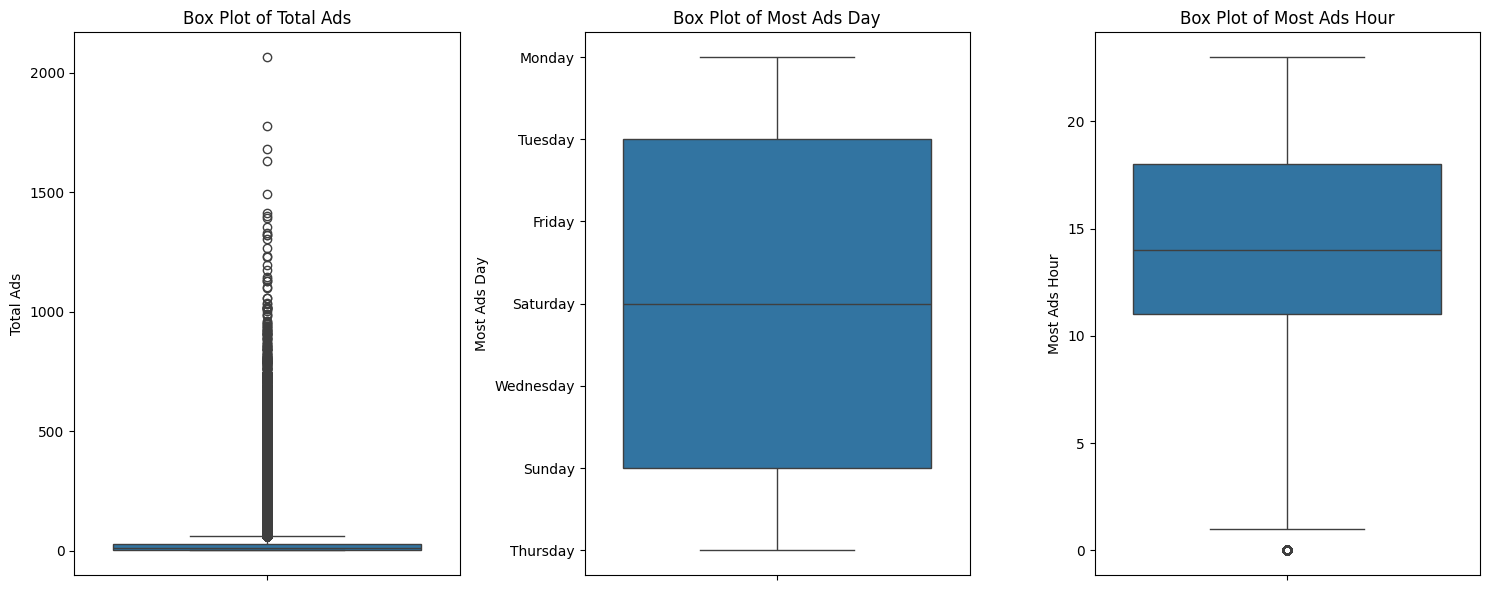

In [ ]:
# List of columns to check for outliers
numerical_cols = ['total ads', 'most ads day', 'most ads hour']

plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1) # Create subplots
    sns.boxplot(y=ad[col])
    plt.title(f'Box Plot of {col.replace("_", " ").title()}') # Nicer title
    plt.ylabel(col.replace("_", " ").title())

plt.tight_layout()
plt.show()

Outlier Interpretation

* First boxplot - Ads

It shows we've most ads activity around 500 to 1000 but a handful of outlier ads upward with some reaching 2000, maybe some advertisers wants to show they're the boss while most ads are moderate based on their market campaign A/B analysis

* Second boxplot - Ads days

Technically this chart is wrong, I only included it to see if it picks up the weekdays, we would use a countplot for it

* Third boxplot - Ads Hour

Looks perfectly ok but a presence of a single outlier at midnight whuch raises an eyebrow but it's not impossible, we see an heavy load from 10am do 8pm with the peak pressure around 3pm ,

A histogram would help us see how Skewed the distribution of these columns are ..

In [ ]:


# columns to check
# we're skipping the weekdays columns to save us from errors

num =[ 'total ads', 'most ads hour']
# numerical summary of our boxplot

for col in num:
    Q1 = ad[col].quantile(0.25)
    Q3 = ad[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ad[(ad[col] < lower_bound) | (ad[col] > upper_bound)].shape[0]
    outliers_percentage = (outliers_count / len(ad)) * 100

    print(f"\nColumn: '{col}'")
    print(f"  IQR (Q3-Q1): {IQR:.2f}")
    print(f"  Lower Bound for Outliers: {lower_bound:.2f}")
    print(f"  Upper Bound for Outliers: {upper_bound:.2f}")
    print(f"  Number of outliers: {outliers_count} ({outliers_percentage:.2f}%)")


Column: 'total ads'
  IQR (Q3-Q1): 23.00
  Lower Bound for Outliers: -30.50
  Upper Bound for Outliers: 61.50
  Number of outliers: 52057 (8.85%)

Column: 'most ads hour'
  IQR (Q3-Q1): 7.00
  Lower Bound for Outliers: 0.50
  Upper Bound for Outliers: 28.50
  Number of outliers: 5536 (0.94%)


In [ ]:

# skewness values
skewness = ad[['total ads' , 'most ads hour']].skew()
print (skewness)

total ads        7.433113
most ads hour   -0.336972
dtype: float64


The chart and the value shows that Total ads is positively skewed to the extreme (7.43) , Ads hour shows symmetrical but the values shows it's slightly negatively skewed (-0.34) which agrees with the notation that most ads were done later hours of the day.

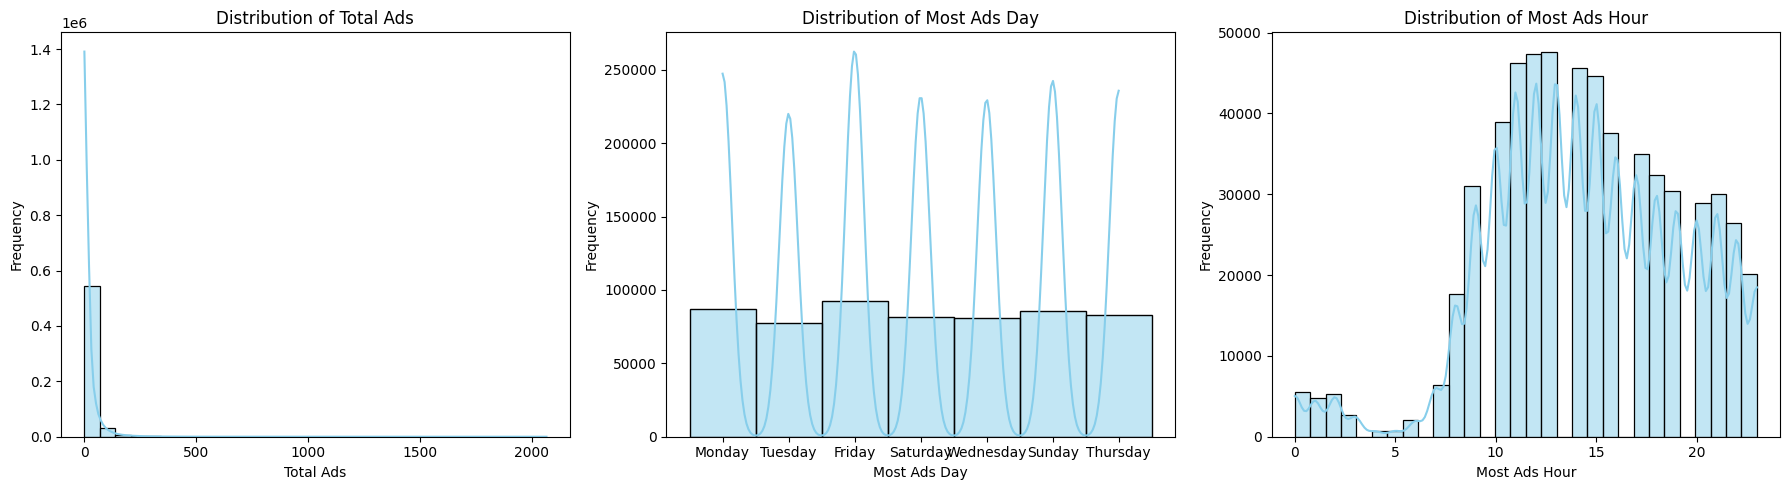

In [ ]:
# Understanding the Skewness of the 3 numerical columns

plt.figure(figsize=(18, 5)) # Adjust figure size as needed for horizontal layout

for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1) # Create subplots
    # Drop NaNs for plotting to avoid warnings/issues if any were introduced
    sns.histplot(ad[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

Next is a QA check on Most ads days & most ads hours to make sure values are within 0-7 and 0-24

In [ ]:
# Quick QA check

# Check 'most ads day'
print("\nColumn: 'most ads day'")
print(f"  Unique values: {sorted(ad['most ads day'].unique().tolist())}") # Sorted for readability
print(f"  Minimum value: {ad['most ads day'].min()}")
print(f"  Maximum value: {ad['most ads day'].max()}")

# Check 'most ads hour'
print("\nColumn: 'most ads hour'")
print(f"  Unique values: {sorted(ad['most ads hour'].unique().tolist())}") # Sorted for readability
print(f"  Minimum value: {ad['most ads hour'].min()}")
print(f"  Maximum value: {ad['most ads hour'].max()}")


Column: 'most ads day'
  Unique values: ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
  Minimum value: Friday
  Maximum value: Wednesday

Column: 'most ads hour'
  Unique values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
  Minimum value: 0
  Maximum value: 23


- Interpretation ---
For 'most ads day':
 - If values are 0-6 or 1-7, they represent days of the week correctly.
 - Any values outside this range (e.g., negatives, values > 7) indicate potential data errors.

- Interpretation --- For 'most ads hour':
 - If values are 0-23, they represent hours of the day correctly.
 - Any values outside this range (e.g., negatives, values > 23) indicate potential data errors.

## Exploratory Data Analysis Stage

### Let's plot a countplot for Ads days column to see its distribution

In [ ]:
# check the weekdays present
print(ad['most ads day'].unique())

['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']


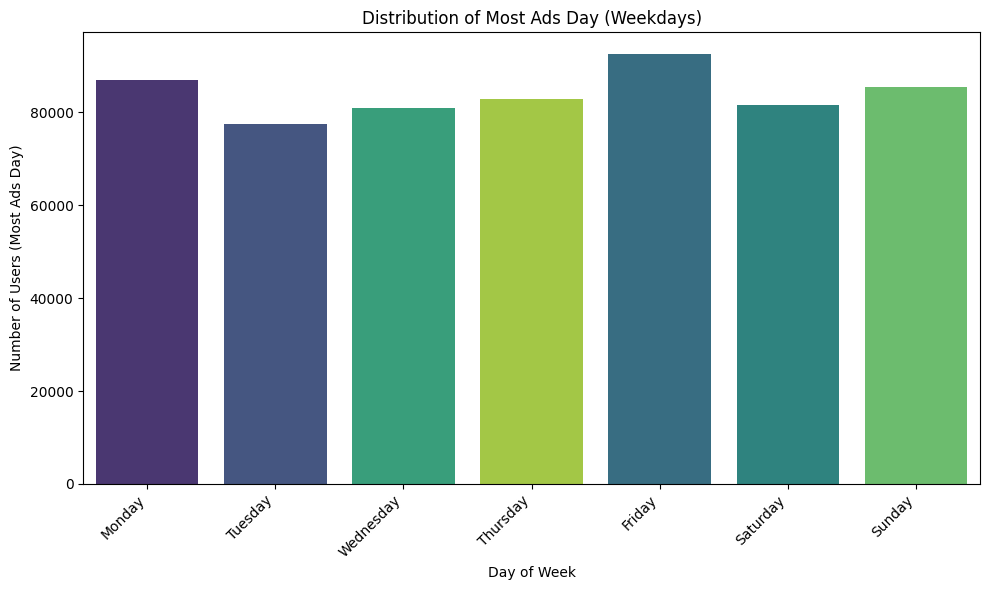

In [ ]:
# Plot the distribution of Ads Weekdays

# rearrange the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Countplot details
plt.figure(figsize=(10, 6))

sns.countplot(x='most ads day', data=ad, order=weekday_order, palette='viridis', hue='most ads day', legend=False)
plt.title('Distribution of Most Ads Day (Weekdays)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Users (Most Ads Day)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()

* Interpretation

From the chart, we can observe the following patterns regarding the day when users saw the highest number of ads:

Higher on Weekdays: The number of users peaking on weekdays (Monday to Friday) appears generally higher than on weekends (Saturday and Sunday).

Monday and Friday seem to have the highest peaks in ad exposure, suggesting these might be key days for user engagement with ads.

Slight Dip on Weekends: Saturday and Sunday show slightly lower numbers compared to some weekdays, although Sunday is comparable to Tuesday, Wednesday, and Thursday. This might indicate a slight shift in user behavior or less ad intensity on weekends.

Relatively Consistent on Mid-Week: Tuesday, Wednesday, and Thursday show somewhat similar, slightly lower counts than Monday and Friday, but still substantial.

Initial Insights:

The company might be getting good ad exposure on Mondays and Fridays, which could be prime times for running campaigns.

Understanding why exposure dips slightly on weekends (or other specific days) could help optimize ad spending and scheduling. Perhaps users are less online, or their attention is directed elsewhere.

### When does Users see the most ads - Heatmap

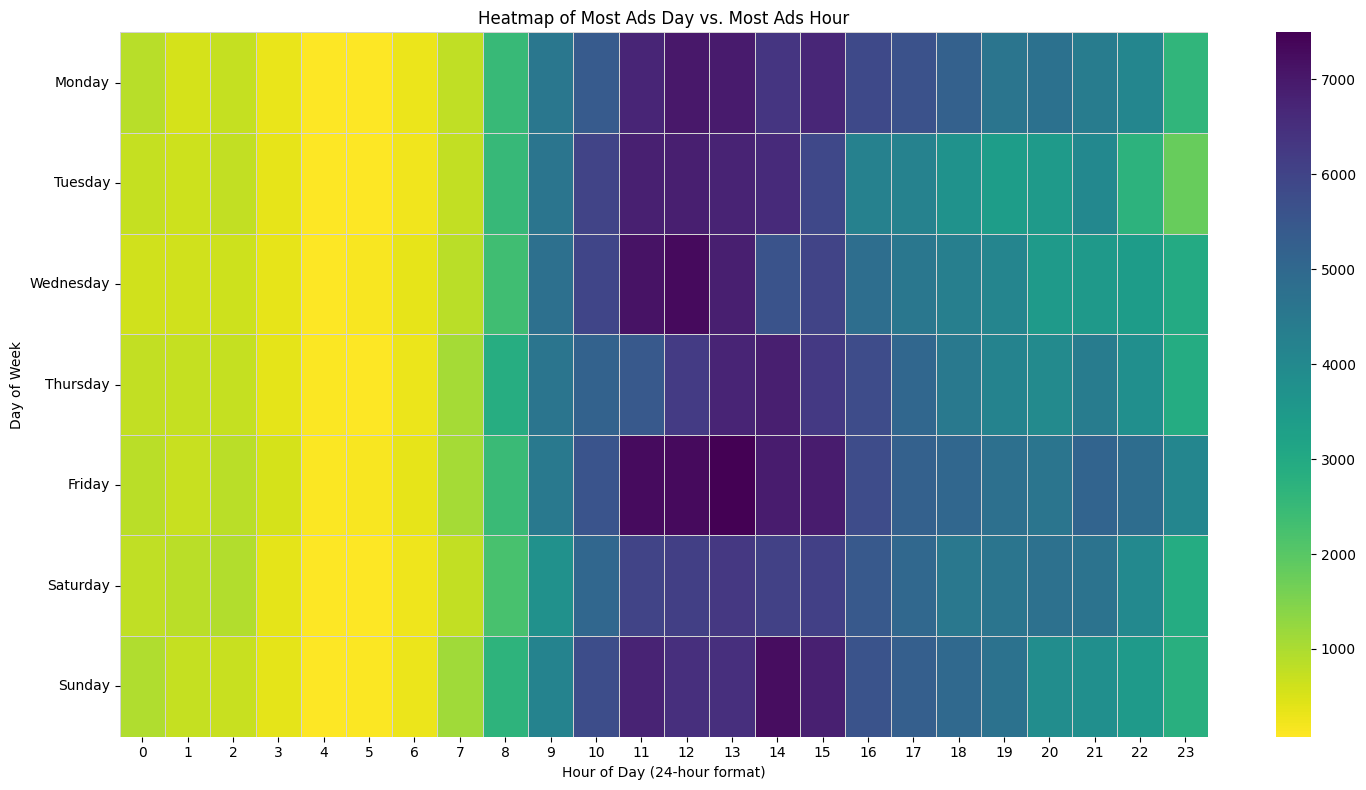

In [ ]:
# We only need the Weekdays and Hour column
ad_cleaned_for_heatmap = ad[['most ads day', 'most ads hour']].copy()

ad_cleaned_for_heatmap['most ads hour'] = pd.to_numeric(ad_cleaned_for_heatmap['most ads hour'], errors='coerce').astype('Int64') # Using 'Int64' to allow NaN integers

# Heatmap particulars
heatmap_data = ad_cleaned_for_heatmap.pivot_table(
    index='most ads day',
    columns='most ads hour',
    aggfunc='size', # Count occurrences
    fill_value=0 # Fill missing combinations with 0
)

# Reindex to ensure correct order for both days and hours
# Filter hours to be within 0-23 and then sort
ordered_hours = sorted([h for h in heatmap_data.columns if 0 <= h <= 23])
heatmap_data = heatmap_data.reindex(index=weekday_order, columns=ordered_hours)

# plot
plt.figure(figsize=(15, 8))

sns.heatmap(heatmap_data, cmap='viridis_r', annot=False, fmt="d", linewidths=.5, linecolor='lightgray')
# annot=True displays the numbers in each cell, can make it too crowded for large datasets, so set to False initially.
# fmt="d" ensures integer format if annot=True
# remove _r to viridis for the reverse order

plt.title('Heatmap of Most Ads Day vs. Most Ads Hour')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Day of Week')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

General Observations:

Mid-Day to Evening Dominance: There's a clear darker band spanning most days from approximately 10 AM (Hour 10) to 6 PM (Hour 18). This indicates that the majority of users experience their peak ad viewing within this core daytime and early evening period.

Early Mornings and Late Nights are Lighter: Hours from 0 (midnight) to around 6 AM, and then from 9 PM (Hour 21) onwards, are generally much lighter, indicating significantly fewer users seeing most ads during these periods. This is expected as most people are typically sleeping or winding down.

Specific Hotspots (Darkest Areas):

Weekday Afternoon/Evening: The darkest cells, indicating the highest concentration of users, are prominently seen during weekday afternoons and early evenings.

Monday, Tuesday, Wednesday, Thursday, and Friday all show very dark blocks roughly between Hour 10/11 and Hour 17/18 (10/11 AM to 5/6 PM). This is a prime window for ad exposure.

Friday between Hour 12 (Noon) and Hour 16 (4 PM) appears particularly dark, reinforcing its status as a high-activity day from the previous bar chart.

Coldspots (Lightest Areas/Zero Activity):

Deep Night/Early Morning: Consistently across all days, the hours from 0 to 6 AM are very light, indicating minimal to no users experiencing peak ad viewing.

Late Evenings: After 8 PM (Hour 20), activity generally drops off significantly across the board.

Weekday vs. Weekend Patterns:

Weekdays (Monday-Friday): Show robust and consistent dark patches in the mid-day to evening hours. The pattern is quite similar across these days.

Weekends (Saturday & Sunday): While still showing some activity, the dark patches are generally less intense and might be slightly shifted compared to weekdays.

Saturday appears to have a slightly less concentrated "hot zone" compared to weekdays, aligning with its lower count in the bar chart.

Sunday maintains a noticeable hot zone, particularly around the afternoon, but it's not as consistently dark or broad as the core weekday hours.

Actionable Insights for Marketing:

Optimal Campaign Scheduling: The prime time for reaching users with ads appears to be between 10 AM and 6 PM (Hours 10-18) on weekdays, especially Monday and Friday. Campaigns launched or intensified during these hours are likely to achieve maximum visibility.

Targeted Weekend Strategies: While overall ad exposure might be lower on weekends, there's still a significant window in the afternoon. Companies might consider different types of ads or messaging for weekend audiences.

Avoid Early Morning/Late Night: Ad spend during hours like 1 AM - 6 AM (Hours 1-6) or after 9 PM (Hour 21) would likely be less efficient, as very few users are seeing their peak ads during these  times

### User id with the most ads


Top 20 User IDs with the Most Ads:
user id
1184464    2065
1637962    1778
1209450    1680
1086307    1632
1512157    1491
1416565    1414
1596993    1398
1351117    1391
1200489    1354
1389878    1328
1348997    1321
1442639    1321
1614536    1302
1456915    1267
1255720    1232
1280138    1229
1571629    1196
1224652    1173
1022390    1146
1427896    1135
Name: total ads, dtype: int64


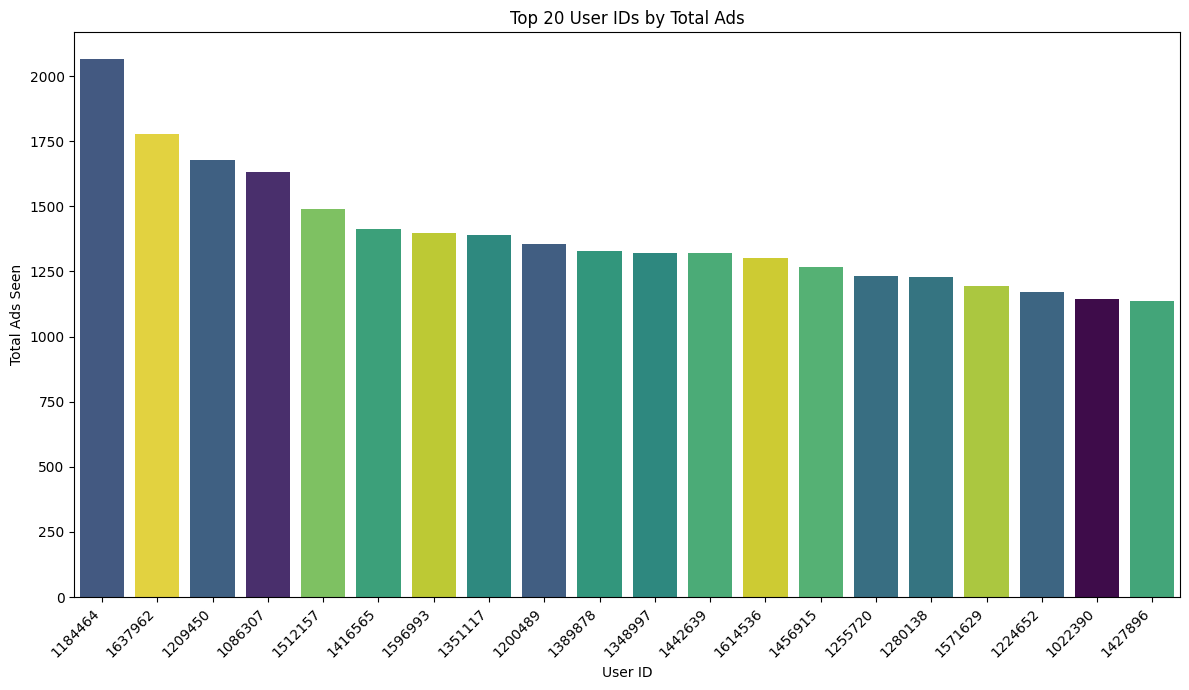

In [ ]:
user_ads_counts = ad.groupby('user id')['total ads'].sum()

# Sort in descending order to find users with the most ads
top_20_users = user_ads_counts.nlargest(20)

print("\nTop 20 User IDs with the Most Ads:")
print(top_20_users)

# Plotting the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_20_users.index, y=top_20_users.values, palette='viridis',
            order=top_20_users.index, hue=top_20_users.index, legend=False)
plt.title('Top 20 User IDs by Total Ads')
plt.xlabel('User ID')
plt.ylabel('Total Ads Seen')
plt.xticks(rotation=45, ha='right') # Rotate User ID labels for readability
plt.tight_layout()
plt.show()

The Bar chart shows the User id 1184464 has the most ads

### Conversion Rate by Ads Group & Total Ads

We want to Calculate the overall conversion rate for each group (ad vs. psa) then visualize it

. To start , we'd first analyze the conversion rate by weekdays to have a true picture

. Secondly, we'd see if there's a relationship between the number of ads seen and conversion by breaking it into bins .

In [ ]:
conversion_by_day = ad.groupby('most ads day')['converted'].agg(
    total_users='count',  # Total users who had their 'most ads day' on this day
    conversions='sum'     # Total conversions for this day (sum of True in 'converted')
).reset_index()

# Calculate the conversion rate
conversion_by_day['conversion_rate'] = (conversion_by_day['conversions'] / conversion_by_day['total_users']) * 100

# Reindex to ensure correct order in the DataFrame before plotting
conversion_by_day['most ads day'] = pd.Categorical(
    conversion_by_day['most ads day'],
    categories=weekday_order,
    ordered=True
)
conversion_by_day = conversion_by_day.sort_values('most ads day')

In [ ]:
# Let's see the Conversion rates by Day

print(conversion_by_day[['most ads day', 'conversion_rate']].round(2))

  most ads day  conversion_rate
1       Monday             3.28
5      Tuesday             2.98
6    Wednesday             2.49
4     Thursday             2.16
0       Friday             2.22
2     Saturday             2.11
3       Sunday             2.45


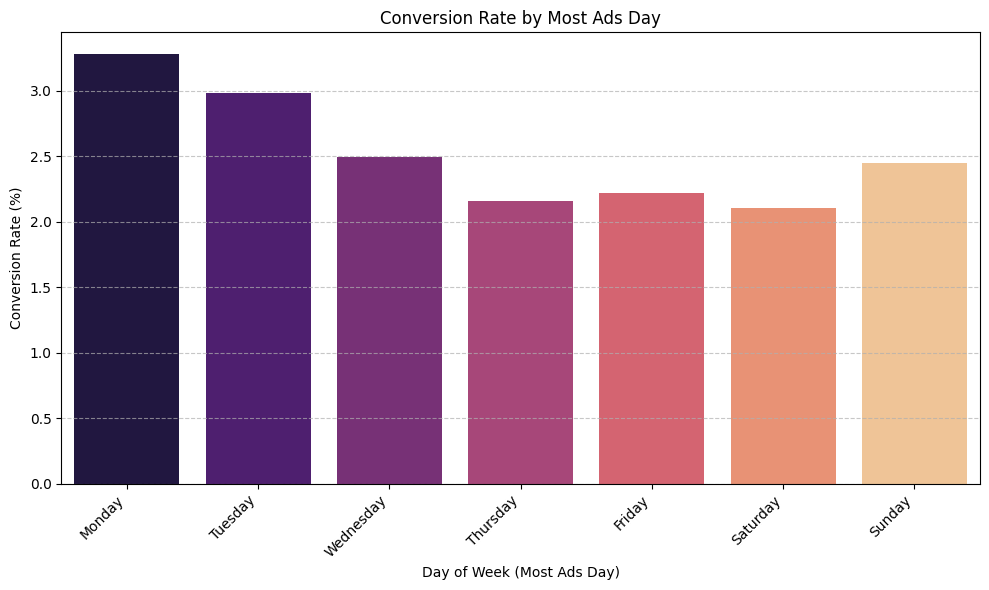

In [ ]:
# Plotting the conversion rates
plt.figure(figsize=(10, 6))
sns.barplot(
    x='most ads day',
    y='conversion_rate',
    data=conversion_by_day,
    order=weekday_order, # variable for weekdays in right order
    palette='magma',
    hue='most ads day',
    legend=False
)

plt.title('Conversion Rate by Most Ads Day')
plt.xlabel('Day of Week (Most Ads Day)')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Interpretation:

Monday is the Conversion Champion: Users who see their most ads on Monday show the highest conversion rate at 3.28%. This indicates that Monday is not just a high-volume day for ad exposure, but also a highly effective day for driving conversions.

Tuesday is Also Strong: Tuesday follows closely behind Monday with a conversion rate of 2.98%, suggesting that the early part of the week is generally more conducive to conversions.

Mid-Week and Weekend Decline:

Conversion rates generally trend downwards through the middle of the week, with Wednesday (2.49%) and Thursday (2.16%) showing lower rates than Monday and Tuesday.

Friday (2.22%) sees a slight rebound compared to Thursday, but it's still significantly lower than Monday and Tuesday. This is interesting because Friday was a high ad exposure day, but it doesn't translate to a proportionally high conversion rate.

Saturday (2.11%) has the lowest conversion rate, which aligns with it being the day with the lowest overall ad exposure as well.

Sunday (2.45%) shows a slight increase from Saturday, performing similarly to Wednesday and Thursday.

* Key Takeaways

With the data provided , Owners of this dataset (Marketers) should consider prioritizing ad campaigns and possibly conversion-focused messaging more heavily on Mondays and Tuesdays, and review strategies for days like Friday and Saturday where ad exposure doesn't translate as effectively into conversions.

### Hypothesis Testing - A/B Test Analysis

#### A. Statistical difference in Conversion Ratea between groups

The goal of this testing is to check if there's a statistically significant difference in conversion rates between different groups. Based on our previous analysis of "Conversion Rates by Most Ads Day," we saw that Monday had the highest conversion rate and Saturday had the lowest.


* Hypothesis

Null Hypothesis (H_0): There is no significant difference in the true conversion rates between users whose most ads day was Monday and those whose most ads day was Saturday.

p_Monday−p_Saturday=0

Alternative Hypothesis (H_1): There is a significant difference in the true conversion rates between users whose most ads day was Monday and those whose most ads day was Saturday.

p_Monday−p_Saturday
neq0 (This is a two-tailed test)

In [ ]:
# libraries needed

import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# Extract data for the two groups (Monday and Saturday)
monday_data = ad[ad['most ads day'] == 'Monday']
saturday_data = ad[ad['most ads day'] == 'Saturday']

# Get the number of conversions (successes) for each group
conversions_monday = monday_data['converted'].sum()
conversions_saturday = saturday_data['converted'].sum()

# Get the total number of users (observations) for each group
total_users_monday = len(monday_data)
total_users_saturday = len(saturday_data)

print(f"Monday: Conversions = {conversions_monday}, Total Users = {total_users_monday}")
print(f"Saturday: Conversions = {conversions_saturday}, Total Users = {total_users_saturday}")

# Handle potential division by zero if a group has no users (though unlikely with this data)
if total_users_monday == 0 or total_users_saturday == 0:
    print("\nCannot perform z-test: One or both groups have no data.")
else:

    count = np.array([conversions_monday, conversions_saturday])
    nobs = np.array([total_users_monday, total_users_saturday])

    # The test returns (test statistic, p-value)
    stat, p_value = proportions_ztest(count, nobs, alternative='two-sided') # 'two-sided' for H1: p1 != p2

    print(f"\nZ-statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # 3. Interpret the p-value
    alpha = 0.05
    print(f"\nSignificance Level (alpha): {alpha}")

    if p_value < alpha:
        print(f"\nConclusion: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the Null Hypothesis.")
        print("There is a statistically significant difference in conversion rates between Monday and Saturday.")
    else:
        print(f"\nConclusion: Since the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the Null Hypothesis.")
        print("There is no statistically significant difference in conversion rates between Monday and Saturday.")

Monday: Conversions = 2857, Total Users = 87073
Saturday: Conversions = 1719, Total Users = 81660

Z-statistic: 14.8632
P-value: 0.0000

Significance Level (alpha): 0.05

Conclusion: Since the p-value (0.0000) is less than alpha (0.05), we reject the Null Hypothesis.
There is a statistically significant difference in conversion rates between Monday and Saturday.


This test provides strong statistical evidence that the observed difference in conversion rates between Monday (3.28%) and Saturday (2.11%) is not due to random chance. There is a true, statistically significant difference in how effective ads are at driving conversions on these two days.

In practical terms, users are significantly more likely to convert when their peak ad exposure occurs on a Monday compared to a Saturday. This reinforces the idea that Monday is a prime day for conversion-focused marketing efforts, while Saturday is considerably less effective.

#### Impact of Total Ads Seen on Conversion Rates

Hypothesis Test: Conversion Rate for Low vs. High Total Ads


* Hypotheses:

Null Hypothesis (H_0): There is no significant difference in the true conversion rates between users who fall into the lowest quantile of 'total ads' and users who fall into the highest quantile of 'total ads'.

Alternative Hypothesis (H_1): There is a significant difference in the true conversion rates between users who fall into the lowest quantile of 'total ads' and users who fall into the highest quantile of 'total ads'. (Two-tailed test)

*  Significance Level (
alpha)

We'll continue using
alpha=0.05.

* 3. Statistical Test:

 Two-Proportion Z-Test

In [ ]:
ad_cleaned_total_ads = ad.dropna(subset=['total ads']).copy()

num_bins = 50 # Bins could be edited to suitable value

try:
    ad_cleaned_total_ads['total_ads_bin'] = pd.qcut(
        ad_cleaned_total_ads['total ads'],
        q=num_bins,
        duplicates='drop',
        precision=0
    )
    print(f"Re-created {len(ad_cleaned_total_ads['total_ads_bin'].unique())} bins for 'total ads'.")

except ValueError as e:
    print(f"Error creating bins for 'total ads': {e}")
    print("This might happen if there aren't enough unique values to create the desired number of bins.")
    print("Please check the distribution of 'total ads'. We might need to adjust 'num_bins' or define manual bins.")
    exit() # Exit if binning fails to prevent further errors


# Identify the lowest and highest bins based on the bin labels
# Sort the unique bins to ensure we get the true min/max
sorted_bins = sorted(ad_cleaned_total_ads['total_ads_bin'].unique())
lowest_bin = sorted_bins[0]
highest_bin = sorted_bins[-1]

print(f"\nComparing lowest bin: {lowest_bin} vs. highest bin: {highest_bin}")

# 1. Extract data for the two groups (lowest and highest total ads bins)
low_ads_data = ad_cleaned_total_ads[ad_cleaned_total_ads['total_ads_bin'] == lowest_bin]
high_ads_data = ad_cleaned_total_ads[ad_cleaned_total_ads['total_ads_bin'] == highest_bin]

# Get the number of conversions (successes) for each group
conversions_low_ads = low_ads_data['converted'].sum()
conversions_high_ads = high_ads_data['converted'].sum()

# Get the total number of users (observations) for each group
total_users_low_ads = len(low_ads_data)
total_users_high_ads = len(high_ads_data)

print(f"Lowest Ads Bin ({lowest_bin}): Conversions = {conversions_low_ads}, Total Users = {total_users_low_ads}")
print(f"Highest Ads Bin ({highest_bin}): Conversions = {conversions_high_ads}, Total Users = {total_users_high_ads}")

# Handle potential division by zero if a group has no users
if total_users_low_ads == 0 or total_users_high_ads == 0:
    print("\nCannot perform z-test: One or both total ads bins have no data. This might happen if 'duplicates='drop'' resulted in very few distinct bins or data is sparse.")
else:
    # 2. Perform the Two-Proportion Z-Test
    count = np.array([conversions_low_ads, conversions_high_ads])
    nobs = np.array([total_users_low_ads, total_users_high_ads])

    stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

    print(f"\nZ-statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # p-value interpretation
    alpha = 0.05
    print(f"\nSignificance Level (alpha): {alpha}")

    if p_value < alpha:
        print(f"\nConclusion: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the Null Hypothesis.")
        print(f"There is a statistically significant difference in conversion rates between users in the '{lowest_bin}' total ads bin and users in the '{highest_bin}' total ads bin.")
    else:
        print(f"\nConclusion: Since the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the Null Hypothesis.")
        print(f"There is no statistically significant difference in conversion rates between users in the '{lowest_bin}' total ads bin and users in the '{highest_bin}' total ads bin.")

Re-created 36 bins for 'total ads'.

Comparing lowest bin: (0.0, 2.0] vs. highest bin: (143.0, 2065.0]
Lowest Ads Bin ((0.0, 2.0]): Conversions = 183, Total Users = 96433
Highest Ads Bin ((143.0, 2065.0]): Conversions = 1881, Total Users = 11728

Z-statistic: -118.4539
P-value: 0.0000

Significance Level (alpha): 0.05

Conclusion: Since the p-value (0.0000) is less than alpha (0.05), we reject the Null Hypothesis.
There is a statistically significant difference in conversion rates between users in the '(0.0, 2.0]' total ads bin and users in the '(143.0, 2065.0]' total ads bin.


#### Experimental(ad) vs Control Group(psa):- Were the ads successful?

In [ ]:
# extract the experiment and control group
ad_group_data = ad[ad['test group'] == 'ad']
psa_group_data = ad[ad['test group'] == 'psa']

# Get the number of conversions (successes) for each group
conversions_ad_group = ad_group_data['converted'].sum()
conversions_psa_group = psa_group_data['converted'].sum()

# Get the total number of users (observations) for each group
total_users_ad_group = len(ad_group_data)
total_users_psa_group = len(psa_group_data)

print(f"Ad Group: Conversions = {conversions_ad_group}, Total Users = {total_users_ad_group}")
print(f"PSA Group: Conversions = {conversions_psa_group}, Total Users = {total_users_psa_group}")

# Handle potential division by zero if a group has no users
if total_users_ad_group == 0 or total_users_psa_group == 0:
    print("\nCannot perform z-test: One or both groups have no data.")
else:
    # 2. Perform the Two-Proportion Z-Test
    count = np.array([conversions_ad_group, conversions_psa_group])
    nobs = np.array([total_users_ad_group, total_users_psa_group])

    # The test returns (test statistic, p-value)
    stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

    print(f"\nZ-statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # 3. Interpret the p-value
    alpha = 0.05
    print(f"\nSignificance Level (alpha): {alpha}")

    if p_value < alpha:
        print(f"\nConclusion: Since the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the Null Hypothesis.")
        print("There is a statistically significant difference in conversion rates between the 'ad' group and the 'psa' group.")
    else:
        print(f"\nConclusion: Since the p-value ({p_value:.4f}) is greater than or equal to alpha ({alpha}), we fail to reject the Null Hypothesis.")
        print("There is no statistically significant difference in conversion rates between the 'ad' group and the 'psa' group.")

Ad Group: Conversions = 14423, Total Users = 564577
PSA Group: Conversions = 420, Total Users = 23524

Z-statistic: 7.3701
P-value: 0.0000

Significance Level (alpha): 0.05

Conclusion: Since the p-value (0.0000) is less than alpha (0.05), we reject the Null Hypothesis.
There is a statistically significant difference in conversion rates between the 'ad' group and the 'psa' group.


We found a statistically significant difference, concluding that the ad campaign was indeed successful in driving conversions (Ad Group Conversion Rate ≈2.55% vs. PSA Group Conversion Rate ≈1.78%).

### Potential Revenue Generation

The dataset has no explicit revenue data column, so we'll need to make a clear assumption for the Average Revenue per Conversion.

We'd assume an Average Revenue per Conversion of $75. This value is purely illustrative and should be replaced with a more accurate figure based on business knowledge.

In [ ]:
# data provided from the last execution:
conversions_ad_group = 14423
total_users_ad_group = 564577
conversions_psa_group = 420
total_users_psa_group = 23524

# --- 1. Define Revenue per Conversion ---
avg_revenue_per_conversion = 75 # dollars

# --- 2. Calculate Baseline Revenue (Control Group - PSA) ---
psa_conversion_rate = conversions_psa_group / total_users_psa_group
baseline_conversions = total_users_psa_group * psa_conversion_rate # This is just conversions_psa_group
baseline_revenue = baseline_conversions * avg_revenue_per_conversion

print(f"Baseline (PSA Group) Conversion Rate: {psa_conversion_rate:.4f} ({psa_conversion_rate*100:.2f}%)")
print(f"Baseline Revenue (from PSA Group): ${baseline_revenue:,.2f}\n")


# --- 3. Calculate Projected Revenue (Experimental Group - Ad) ---
# Total users in the experiment (sum of both groups from the A/B test)
total_users_in_experiment = total_users_ad_group + total_users_psa_group

ad_conversion_rate = conversions_ad_group / total_users_ad_group
projected_conversions_ad_strategy = total_users_in_experiment * ad_conversion_rate
projected_revenue_ad_strategy = projected_conversions_ad_strategy * avg_revenue_per_conversion

print(f"Ad Group Conversion Rate: {ad_conversion_rate:.4f} ({ad_conversion_rate*100:.2f}%)")
print(f"Projected Conversions (if ad strategy rolled out to all users in experiment): {projected_conversions_ad_strategy:.0f}")
print(f"Projected Revenue (if ad strategy rolled out to all users in experiment): ${projected_revenue_ad_strategy:,.2f}\n")


# --- 4. Estimate Incremental Revenue ---
incremental_revenue = projected_revenue_ad_strategy - baseline_revenue

print(f"Estimated Incremental Revenue (Ad Strategy vs. PSA Strategy): ${incremental_revenue:,.2f}\n")

Baseline (PSA Group) Conversion Rate: 0.0179 (1.79%)
Baseline Revenue (from PSA Group): $31,500.00

Ad Group Conversion Rate: 0.0255 (2.55%)
Projected Conversions (if ad strategy rolled out to all users in experiment): 15024
Projected Revenue (if ad strategy rolled out to all users in experiment): $1,126,796.80

Estimated Incremental Revenue (Ad Strategy vs. PSA Strategy): $1,095,296.80



### Interaction Effects Between Ad Dimensions

Which weekday and hour shows the highest conversion rates, is it 9am on Monday?


Conversion Rates by Day and Hour (Table format):

most ads hour    0     1     2     3     4     5     6     7     8     9   \
most ads day                                                                
Monday         1.62  1.59  0.68  1.21  0.00  3.19  3.94  1.78  3.27  2.62   
Tuesday        1.90  1.38  0.54  2.33  1.92  1.32  2.22  2.13  1.75  2.31   
Wednesday      1.17  0.82  0.47  0.30  1.96  0.70  1.37  1.17  1.62  1.67   
Thursday       2.39  1.79  1.25  0.54  2.61  2.08  1.98  1.50  1.57  1.60   
Friday         1.90  1.01  1.18  0.37  1.64  1.48  1.17  1.87  1.62  1.96   
Saturday       2.28  0.83  0.43  1.07  0.00  5.32  4.91  2.39  2.29  1.59   
Sunday         1.57  1.68  0.56  1.84  1.96  1.57  0.69  1.96  1.63  1.60   

most ads hour  ...    14    15    16    17    18    19    20    21    22    23  
most ads day   ...                                                              
Monday         ...  4.44  4.25  3.70  3.57  2.74  3.07  3.17  3.29  2.94  2.39  
Tuesday     

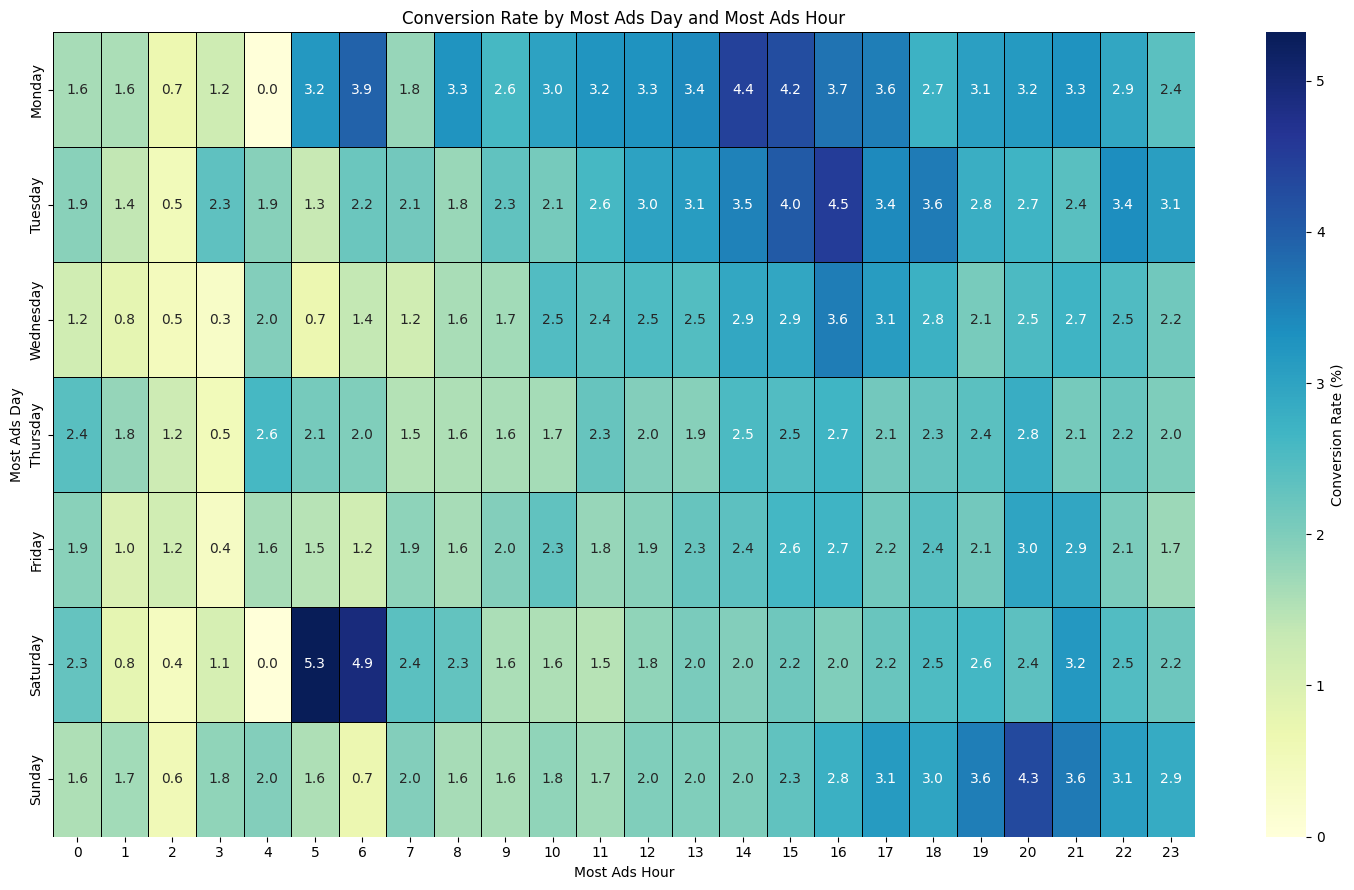

In [ ]:
# create the clean variable
df_cleaned = ad[['most ads day', 'most ads hour', 'converted']].copy()

# Ensure 'most ads hour' is integer for correct sorting
df_cleaned['most ads hour'] = df_cleaned['most ads hour'].astype(int)

# Group by day and hour, calculate conversion rate
conversion_by_day_hour = df_cleaned.groupby(['most ads day', 'most ads hour'])['converted'].agg(
    total_users='count',
    conversions='sum'
).reset_index()

# Calculate conversion rate
conversion_by_day_hour['conversion_rate'] = (
    conversion_by_day_hour['conversions'] / conversion_by_day_hour['total_users']
) * 100

# Define the preferred chronological order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Define the order for hours (0 to 23)
hour_order = sorted(df_cleaned['most ads hour'].unique())

# Heatmap data
heatmap_data = conversion_by_day_hour.pivot_table(
    index='most ads day',
    columns='most ads hour',
    values='conversion_rate'
)

# Reindex to ensure correct order of days and hours on the heatmap
heatmap_data = heatmap_data.reindex(index=weekday_order, columns=hour_order)

print("\nConversion Rates by Day and Hour (Table format):\n")
print(heatmap_data.round(2))

# Plotting the heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(
    heatmap_data,
    annot=True, # Show the conversion rate values on the heatmap
    fmt=".1f", # annotation to decimal places
    cmap="YlGnBu",
    linewidths=.5, # Add lines between cells
    linecolor='black', # Color of the lines
    cbar_kws={'label': 'Conversion Rate (%)'} # Color bar label
)


plt.title('Conversion Rate by Most Ads Day and Most Ads Hour')
plt.xlabel('Most Ads Hour')
plt.ylabel('Most Ads Day')
plt.tight_layout()
plt.show()

The chart reveals specific "hot spots" and "cold spots" for conversion effectiveness based on the precise day and hour a user saw most of their ads.

Peak Conversion Times: Surprisingly, the highest conversion rates are found on Saturday very early mornings (5:00-6:00 AM), alongside strong performance on Tuesday late afternoon (4:00 PM) and Monday mid-afternoon (2:00-3:00 PM), and Sunday evening (8:00 PM).

Inefficient Times: Conversion rates are consistently lowest across nearly all days during the deep night hours (1:00 AM - 4:00 AM).

Strategic Insights: This granular view highlights that optimal ad timing is not just about the day of the week, but specific hours within those days. Leveraging these peak day-hour combinations can significantly boost conversion efficiency, even on days that are generally less effective overall.

#### Overall data said Monday earlier, now granular analysis shows Saturday, Why?


"Saturdays exhibit the lowest overall conversion rates (approx. 2.11%)"

This 2.11% is the average conversion rate for the entire day of Saturday. It's calculated by taking all conversions that happened on Saturday, divided by all users whose "most ads day" was Saturday, across all 24 hours. This average is heavily influenced by the performance during all hours of the day.

"Saturday 5:00-6:00 AM surprisingly shows the highest conversion rates (5.32% and 4.91% respectively)"

These are highly specific "hot spots" within Saturday. This means that for the small group of users who had their most ads hour at 5:00 AM or 6:00 AM on a Saturday, their conversion rate was exceptionally high.

The Reconciliation:

The reason Saturday's overall average is low, despite having these incredibly high-performing early morning hours, is that the majority of ad exposure (and subsequent conversion activity) for Saturday likely occurs during other hours of the day which have much lower conversion rates.

Imagine Saturday's ad activity spread across the day:

5:00 AM - 6:00 AM: Very high conversion rate (e.g., 5%) but perhaps a relatively small number of users overall.

7:00 AM - 11:00 PM: Many more users, but their conversion rates might be much lower (e.g., 1-2%).

When you average these, the lower performance over a larger number of users/hours pulls down the overall daily average, masking the brilliance of that early morning window.

### Reports and Recommendations

1. Key Findings:

Based on our comprehensive analysis of the marketing data, here are the consolidated key findings:

Overall Ad Effectiveness (A/B Test Result): The ad campaign was highly successful and statistically significant in driving conversions.

The Ad Group showed a conversion rate of approximately 2.55%.

The PSA (control) Group showed a conversion rate of approximately 1.79%.

The p-value of 0.0000 confirms this difference is not due to chance, indicating the ads have a clear positive impact.

Impact of Day of Week on Conversion:

Monday and Tuesday are generally the most effective days for conversions, with Monday showing approx. 3.28% and Tuesday approx. 2.98%.

Saturdays exhibit the lowest overall conversion rates (approx. 2.11%), showing a statistically significant difference compared to Mondays.

Friday had high ad exposure but a comparatively lower conversion rate (approx. 2.22%), suggesting that high exposure doesn't always equate to high conversion efficiency on certain days.

Relationship Between Total Ads Seen and Conversion:

There is a dramatic and highly statistically significant positive relationship between the number of ads seen and conversion rates.

Users in the lowest ads bin (0-2 ads) had a very low conversion rate (approx. 0.19%).

Users in the highest ads bin (143-2065 ads) had a vastly superior conversion rate (approx. 16.04%), indicating that reaching a certain threshold of ad exposure is crucial for driving conversions.

Key Interaction Effect: Conversion by Day and Hour: (NEW INSIGHTS!)

Peak Performance Hotspots:

Saturday 5:00-6:00 AM surprisingly shows the highest conversion rates (5.32% and 4.91% respectively), indicating a highly engaged niche audience during these early hours.

Other strong performing windows include Tuesday 4:00 PM (4.53%), Monday 2:00-3:00 PM (4.44%, 4.25%), and Sunday 8:00 PM (4.32%).

Consistently Strong Periods: Late afternoon/evening (roughly 2:00 PM - 10:00 PM) generally performs well across weekdays and Sunday.

Consistently Weak Periods: Deep night hours (1:00 AM - 4:00 AM) consistently show very low conversion rates across almost all days.

2. Present Revenue Estimates:

(Based on the assumption of $75 Average Revenue per Conversion)

Estimated Baseline Revenue (from PSA Group): $31,500.00

Projected Revenue (if ad strategy rolled out to all users in experiment): $1,126,796.80

Estimated Incremental Revenue (Gain from Ad Strategy): $1,095,296.80

This implies that rolling out the ad strategy to the entire experimental user base could generate approximately $1.1 million in additional revenue compared to the baseline, based on our stated assumption for revenue per conversion.

3. Recommendations:

Based on these compelling findings, here are actionable recommendations for optimizing your marketing efforts:

Confirm Revenue per Conversion: Immediately work with the finance or product team to get a precise average revenue per converted user. Our $75 assumption is a placeholder; accurate revenue data will make the financial projections precise and robust.

Strategic Ad Scheduling - Leverage Precision Timing:

Capitalize on Hidden Gems (Saturday Early Morning): Invest heavily in targeted ad campaigns for Saturday between 5:00 AM - 6:00 AM. This niche window shows exceptionally high conversion and might be underutilized.

Reinforce Strong Weekday Afternoons/Evenings: Maintain or increase ad spend on Monday (2:00 PM - 10:00 PM), Tuesday (2:00 PM - 10:00 PM), and Sunday (6:00 PM - 10:00 PM), as these are proven high-conversion periods.

Re-evaluate Low-Performing Windows: Significantly reduce or pause ad exposure during deep night hours (1:00 AM - 4:00 AM) across all days, as these are highly inefficient. Review ad strategies for mid-week (Wednesday, Thursday) and Friday where overall performance is less stellar.

Optimize Ad Exposure Thresholds:

Ensure Sufficient Ad Exposure: The analysis strongly indicates that more ads lead to higher conversions. Implement strategies (e.g., retargeting campaigns, higher frequency capping for high-value segments) to ensure users, especially high-potential ones, reach a more impactful number of ad views. Avoid simply showing a user 1-2 ads.

Acknowledge and Leverage Ad Campaign Success:

The core ad campaign is demonstrably effective. Continue to invest in and refine similar ad strategies that have yielded positive results.

Monitor Performance Continuously: Regularly track conversion rates and user behavior, particularly focusing on new day-hour interaction patterns, to identify new trends or shifts in effectiveness and adapt strategies accordingly.

### Tools Used:

- Google Sheets: For overviewing and understanding the dataset.

- Google Colab: Python environment for data analysis and A/B Testing.

- Google Gemini: Assistance in precise interpretations of charts and figures.

## Thank You

- Author: Emmanuel Itighise